<a href="https://colab.research.google.com/github/anjumorris/DataScienceProject/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Run this cell and select the kaggle.json file downloaded from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kshamakumar","key":"31cb0845c39ffc66e315f8a332bbd45e"}'}

In [5]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [6]:
# The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Creating directory and changing the current working directory
!mkdir traffic_dataset
%cd traffic_dataset

/content/traffic_dataset


In [8]:
# Searching for dataset
!kaggle datasets list -s traffic-signs-classification

ref                                                                title                                               size  lastUpdated          downloadCount  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           6656  
flo2607/traffic-signs-classification                               Traffic Signs Classification                        65MB  2020-03-10 16:51:34           1413  
valentynsichkar/traffic-signs-dataset-in-yolo-format               Traffic Signs Dataset in YOLO format               250MB  2020-04-03 22:25:16           3148  
dmitryyemelyanov/chinese-traffic-signs                             Chinese Traffic Signs                              185MB  2020-04-16 19:42:40            646  
imadmoussa/traffic-signs    

In [9]:
# Downloading dataset and coming out of directory
!kaggle datasets download flo2607/traffic-signs-classification  
%cd ..

 93% 61.0M/65.5M [00:00<00:00, 85.4MB/s]
100% 65.5M/65.5M [00:00<00:00, 112MB/s] 
/content


In [10]:
# Unzipping downloaded file and removing unusable file
!unzip traffic_dataset/traffic-signs-classification.zip -d traffic_dataset
!rm traffic_dataset/traffic-signs-classification.zip.zip
!rm -rf traffic_dataset/extract.py
!rm -rf traffic_dataset/labels.csv
!rm -rf traffic_dataset/model_trained.p

Streaming output truncated to the last 5000 lines.
  inflating: traffic_dataset/myData/8/00015_00011.jpg  
  inflating: traffic_dataset/myData/8/00015_00012.jpg  
  inflating: traffic_dataset/myData/8/00015_00013.jpg  
  inflating: traffic_dataset/myData/8/00015_00014.jpg  
  inflating: traffic_dataset/myData/8/00015_00015.jpg  
  inflating: traffic_dataset/myData/8/00015_00016.jpg  
  inflating: traffic_dataset/myData/8/00015_00017.jpg  
  inflating: traffic_dataset/myData/8/00015_00018.jpg  
  inflating: traffic_dataset/myData/8/00015_00019.jpg  
  inflating: traffic_dataset/myData/8/00015_00020.jpg  
  inflating: traffic_dataset/myData/8/00015_00021.jpg  
  inflating: traffic_dataset/myData/8/00015_00022.jpg  
  inflating: traffic_dataset/myData/8/00015_00023.jpg  
  inflating: traffic_dataset/myData/8/00015_00024.jpg  
  inflating: traffic_dataset/myData/8/00015_00025.jpg  
  inflating: traffic_dataset/myData/8/00015_00026.jpg  
  inflating: traffic_dataset/myData/8/00015_00027.jpg

In [11]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

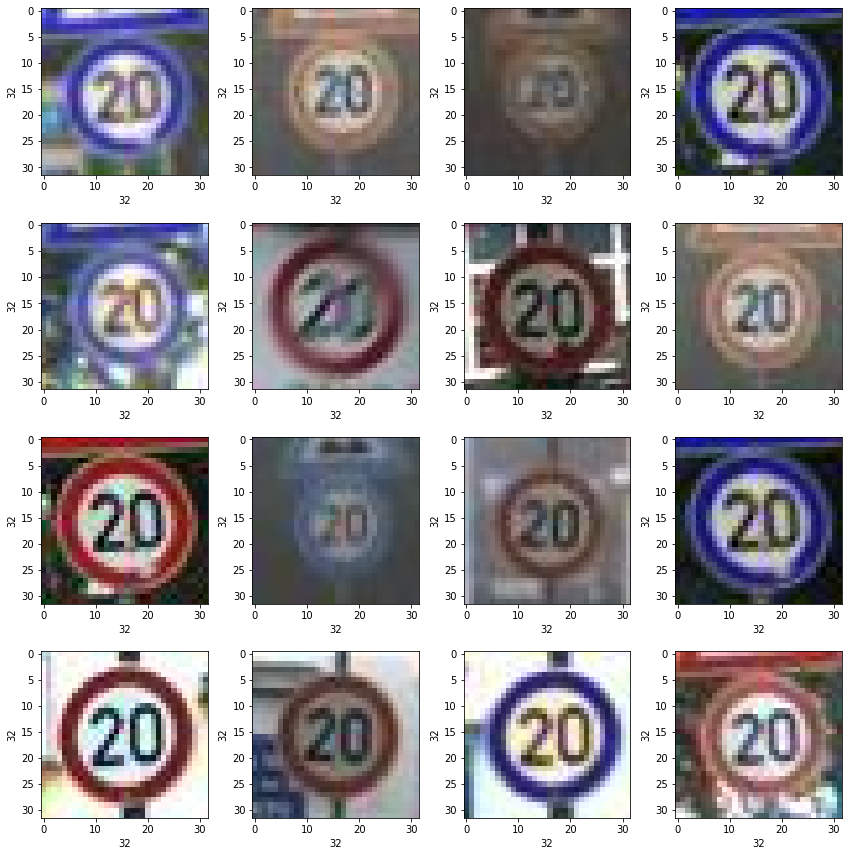

In [12]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_dataset/myData/0"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [19]:
# As size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []
images = []
label_id = []

for i in range(0,43):
    labels = 'traffic_dataset/myData' + '/'+str(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [20]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  32.0  Dimension 2 Mean :  32.0


In [21]:
label_id = np.array(label_id)
label_id.shape

(73139,)

In [23]:
images = np.array(images)
images.shape

(73139, 32, 32, 3)

In [24]:
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

1     4920
13    4080
12    3990
38    3930
10    3810
dtype: int64

In [25]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [26]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [27]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [28]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [29]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
458/458 - 146s - loss: 4.4945 - accuracy: 0.0571 - val_loss: 3.5923 - val_accuracy: 0.0683 - 146s/epoch - 319ms/step
Epoch 2/10
458/458 - 144s - loss: 3.5567 - accuracy: 0.0670 - val_loss: 3.5206 - val_accuracy: 0.0683 - 144s/epoch - 315ms/step
Epoch 3/10
458/458 - 144s - loss: 3.5123 - accuracy: 0.0670 - val_loss: 3.4933 - val_accuracy: 0.0683 - 144s/epoch - 313ms/step
Epoch 4/10
458/458 - 143s - loss: 3.4963 - accuracy: 0.0670 - val_loss: 3.4834 - val_accuracy: 0.0683 - 143s/epoch - 313ms/step
Epoch 5/10
458/458 - 144s - loss: 3.4907 - accuracy: 0.0670 - val_loss: 3.4798 - val_accuracy: 0.0683 - 144s/epoch - 313ms/step
Epoch 6/10
458/458 - 143s - loss: 3.4887 - accuracy: 0.0670 - val_loss: 3.4784 - val_accuracy: 0.0683 - 143s/epoch - 313ms/step
Epoch 7/10
458/458 - 143s - loss: 3.4880 - accuracy: 0.0670 - val_loss: 3.4778 - val_accuracy: 0.0683 - 143s/epoch - 312ms/step
Epoch 8/10
458/458 - 143s - loss: 3.4877 - accuracy: 0.0670 - val_loss: 3.4775 - val_accuracy: 0.0683 - 

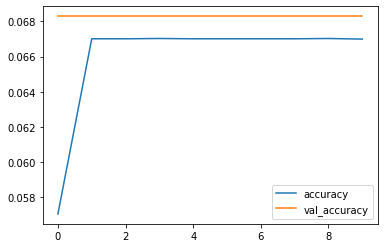

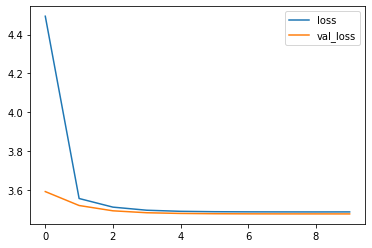

In [30]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()